In [1]:
from keras import backend as K
import time
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline
np.random.seed(2017) 
from keras.models import Sequential
from keras.layers.convolutional import Convolution2D, MaxPooling2D,Conv2D
from keras.layers import Activation, Flatten, Dense, Dropout
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils

Using TensorFlow backend.


In [2]:
from keras.datasets import cifar10
(train_features, train_labels), (test_features, test_labels) = cifar10.load_data()
num_train, img_channels, img_rows, img_cols =  train_features.shape
num_test, _, _, _ =  test_features.shape
num_classes = len(np.unique(train_labels))

170500096/170498071 [==============================] - 2s 0us/step


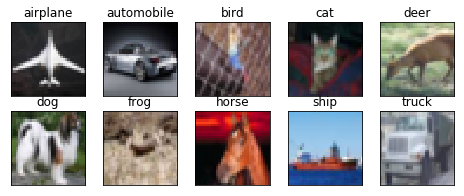

In [3]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']
fig = plt.figure(figsize=(8,3))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(train_labels[:]==i)[0]
    features_idx = train_features[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = features_idx[img_num]
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()

In [0]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

In [0]:
def accuracy(test_x, test_y, model):
    result = model.predict(test_x)
    predicted_class = np.argmax(result, axis=1)
    true_class = np.argmax(test_y, axis=1)
    num_correct = np.sum(predicted_class == true_class) 
    accuracy = float(num_correct)/result.shape[0]
    return (accuracy * 100)

In [0]:
train_features = train_features.astype('float32')/255
test_features = test_features.astype('float32')/255
# convert class labels to binary class labels
train_labels = np_utils.to_categorical(train_labels, num_classes)
test_labels = np_utils.to_categorical(test_labels, num_classes)

In [7]:
from keras import regularizers
weight_decay = 0.005
    
model = Sequential()


# first convolution block
model.add(Convolution2D(32, (3, 3), padding='same',
                         input_shape=[32,32,3],kernel_regularizer=regularizers.l2(weight_decay))) #32
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Convolution2D(64, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay))) #32
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Convolution2D(64, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay))) #32
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

# first transition block with bottlneck
model.add(MaxPooling2D(pool_size=(2, 2)))   #16
model.add(Convolution2D(32, 1, 1, activation='relu'))


# second convolution block
model.add(Convolution2D(128, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))  #16
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Convolution2D(128, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))  #16
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

# second transition block with bottlneck
model.add(MaxPooling2D(pool_size=(2, 2)))  #8
model.add(Convolution2D(64, 1, 1, activation='relu'))

# third convolution block
model.add(Convolution2D(256, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))  #8
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Convolution2D(256, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))  #8
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Convolution2D(256, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))   #18
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

# third transition block with bottlneck
model.add(MaxPooling2D(pool_size=(2, 2)))   #4
model.add(Convolution2D(64, 1, 1, activation='relu'))

# fourth convolution block
model.add(Convolution2D(512, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay))) #4
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Convolution2D(512, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))#4
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

# fourth transition block with bottlneck
model.add(MaxPooling2D(pool_size=(2, 2))) #2
model.add(Convolution2D(64, 1, 1, activation='relu'))


# fifth convolution block
model.add(Convolution2D(512, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))  #2
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Convolution2D(512, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))  #2
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

# fifth transition block with bottlneck
model.add(MaxPooling2D(pool_size=(2, 2)))   #1
model.add(Convolution2D(64, 1, 1, activation='relu'))

# final convolution block
model.add(Convolution2D(512, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))  #1
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Convolution2D(10, (3, 3), padding='same'))


model.add(Flatten())

model.add(Activation('softmax'))
model.summary()

W0618 17:35:44.449532 140575969793920 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0618 17:35:44.492337 140575969793920 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0618 17:35:44.498690 140575969793920 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0618 17:35:44.542526 140575969793920 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W0618 17:35:44.543284 1405759697

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 64)        18496     
_________________________________________________________________
activation_2 (Activation)    (None, 32, 32, 64)        0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 32, 32, 64)        256       
__________

In [8]:
from keras.optimizers import adam
adam = adam(lr=0.01, beta_1=0.9, beta_2=0.999, epsilon=1e-8,decay=0.005)
model.compile(loss='categorical_crossentropy',
             optimizer=adam,
             metrics=['accuracy'])

W0618 17:35:49.107468 140575969793920 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, steps_per_epoch=390, epochs=100)`
  if sys.path[0] == '':
W0618 17:35:49.551973 140575969793920 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and wil

Epoch 1/100
390/390 [==============================] - 44s 114ms/step - loss: 5.7050 - acc: 0.2197 - val_loss: 3.0422 - val_acc: 0.1000
Epoch 2/100
390/390 [==============================] - 36s 93ms/step - loss: 2.3661 - acc: 0.2917 - val_loss: 2.9817 - val_acc: 0.1255
Epoch 3/100
390/390 [==============================] - 35s 89ms/step - loss: 2.1527 - acc: 0.3420 - val_loss: 2.5987 - val_acc: 0.2000
Epoch 4/100
390/390 [==============================] - 35s 90ms/step - loss: 1.9695 - acc: 0.4144 - val_loss: 2.3971 - val_acc: 0.2518
Epoch 5/100
390/390 [==============================] - 35s 89ms/step - loss: 1.8328 - acc: 0.4827 - val_loss: 2.6218 - val_acc: 0.2385
Epoch 6/100
390/390 [==============================] - 35s 89ms/step - loss: 1.7088 - acc: 0.5418 - val_loss: 2.4900 - val_acc: 0.2590
Epoch 7/100
390/390 [==============================] - 35s 89ms/step - loss: 1.6031 - acc: 0.5952 - val_loss: 1.9232 - val_acc: 0.4684
Epoch 8/100
390/390 [==============================] -

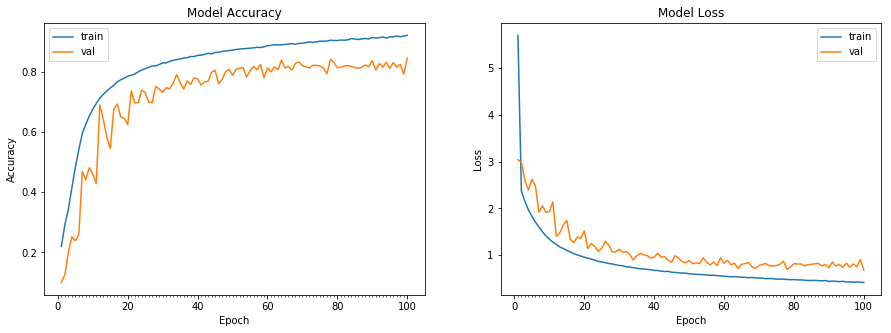

Accuracy on test data is: 84.49


In [9]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False)


# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 100, 
                                 validation_data = (test_features, test_labels), verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

modification

*1x1 convalution layer after each maxpooling layer
*dropout with L2 regulariser
* all the layers are convolved with 3x3 kernal with same padding which produce input and output feature map channel dimentions are the same.
* batch normalization

base accuracy : 83.40
Improved Accuracy : 84.49
